In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv("heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [3]:
df.shape

(1025, 14)

In [4]:
df.target.value_counts()

1    526
0    499
Name: target, dtype: int64

 ## Data Visualization

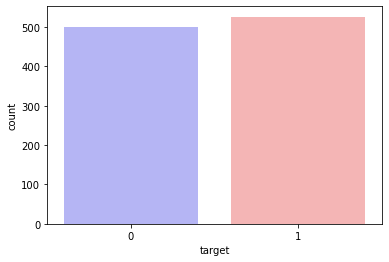

In [5]:
sns.countplot(x="target", data=df, palette="bwr")
plt.show()

In [6]:
countNoDisease = len(df[df.target == 0])
countHaveDisease = len(df[df.target == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(df.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(df.target))*100)))

Percentage of Patients Haven't Heart Disease: 48.68%
Percentage of Patients Have Heart Disease: 51.32%


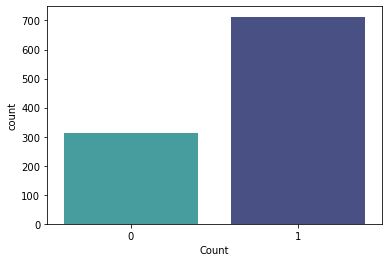

In [7]:
sns.countplot(x='sex', data=df, palette="mako_r")
plt.xlabel("Sex (0 = Female, 1= Male)")
plt.xlabel("Count")
plt.show()

In [8]:
countFemale = len(df[df.sex == 0])
countMale = len(df[df.sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(df.sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(df.sex))*100)))

Percentage of Female Patients: 30.44%
Percentage of Male Patients: 69.56%


In [9]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


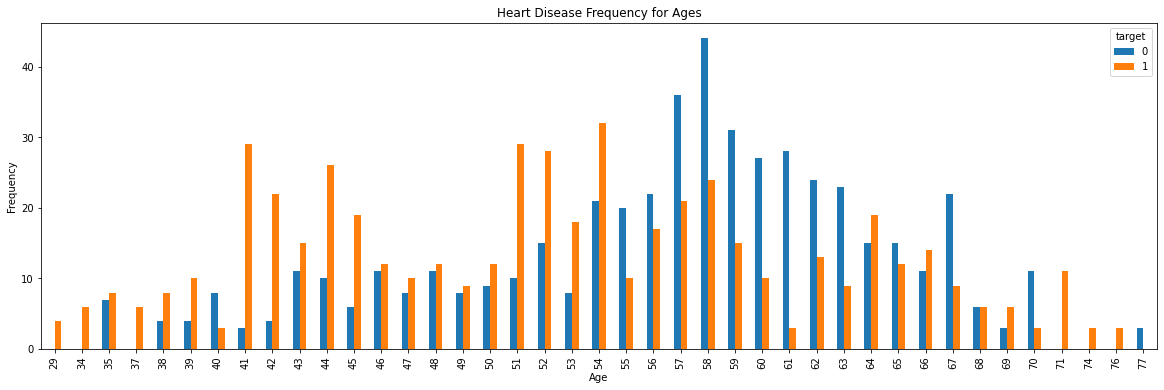

In [10]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

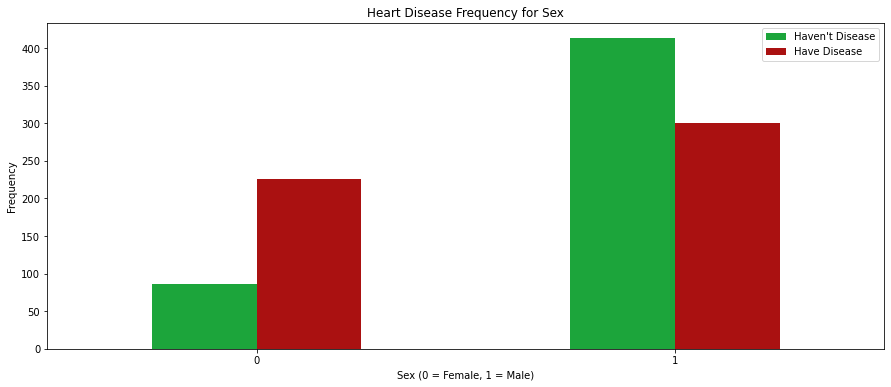

In [11]:
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

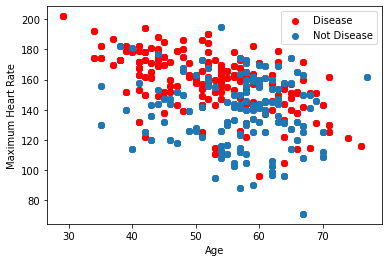

In [12]:
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

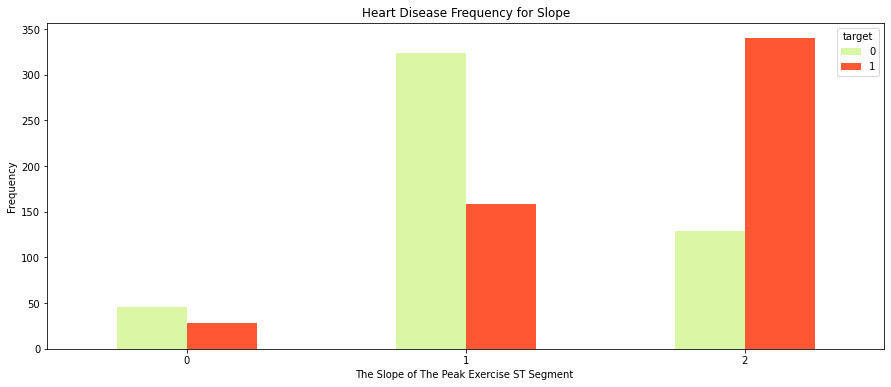

In [13]:
pd.crosstab(df.slope,df.target).plot(kind="bar",figsize=(15,6),color=['#DAF7A6','#FF5733' ])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

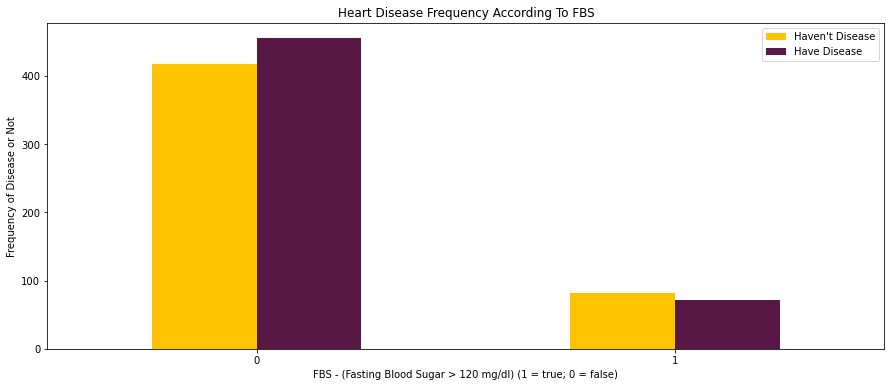

In [14]:
pd.crosstab(df.fbs,df.target).plot(kind="bar",figsize=(15,6),color=['#FFC300','#581845' ])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

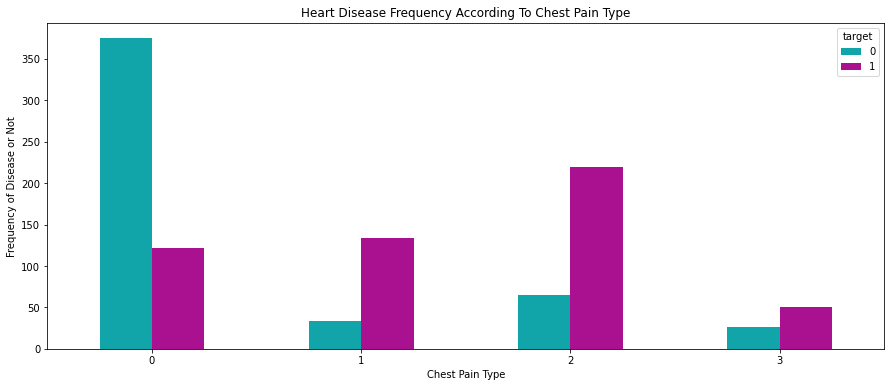

In [15]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

# Creating Model for Logistic Regression

In [16]:
y = df.target.values
x_data = df.drop(['target'], axis = 1)

In [17]:
# Normalize
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

In [19]:
#transpose matrices
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

In [20]:
#initialize
def initialize(dimension):
    
    weight = np.full((dimension,1),0.01)
    bias = 0.0
    return weight,bias

In [21]:
def sigmoid(z):
    
    y_head = 1/(1+ np.exp(-z))
    return y_head

In [22]:
def forwardBackward(weight,bias,x_train,y_train):
    # Forward
    
    y_head = sigmoid(np.dot(weight.T,x_train) + bias)
    loss = -(y_train*np.log(y_head) + (1-y_train)*np.log(1-y_head))
    cost = np.sum(loss) / x_train.shape[1]
    
    # Backward
    derivative_weight = np.dot(x_train,((y_head-y_train).T))/x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients = {"Derivative Weight" : derivative_weight, "Derivative Bias" : derivative_bias}
    
    return cost,gradients

In [23]:
def update(weight,bias,x_train,y_train,learningRate,iteration) :
    costList = []
    index = []
    
    #for each iteration, update weight and bias values
    for i in range(iteration):
        cost,gradients = forwardBackward(weight,bias,x_train,y_train)
        weight = weight - learningRate * gradients["Derivative Weight"]
        bias = bias - learningRate * gradients["Derivative Bias"]
        
        costList.append(cost)
        index.append(i)

    parameters = {"weight": weight,"bias": bias}
    
    print("iteration:",iteration)
    print("cost:",cost)

    plt.plot(index,costList)
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()

    return parameters, gradients

In [24]:
def predict(weight,bias,x_test):
    z = np.dot(weight.T,x_test) + bias
    y_head = sigmoid(z)

    y_prediction = np.zeros((1,x_test.shape[1]))
    
    for i in range(y_head.shape[1]):
        if y_head[0,i] <= 0.5:
            y_prediction[0,i] = 0
        else:
            y_prediction[0,i] = 1
    return y_prediction

In [25]:
def logistic_regression(x_train,y_train,x_test,y_test,learningRate,iteration):
    dimension = x_train.shape[0]
    weight,bias = initialize(dimension)
    
    parameters, gradients = update(weight,bias,x_train,y_train,learningRate,iteration)

    y_prediction = predict(parameters["weight"],parameters["bias"],x_test)
    
    print("Manuel Test Accuracy: {:.2f}%".format((100 - np.mean(np.abs(y_prediction - y_test))*100)))

iteration: 100
cost: 0.39149755388435975


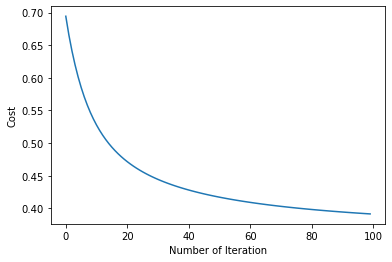

Manuel Test Accuracy: 88.29%


In [26]:
logistic_regression(x_train,y_train,x_test,y_test,1,100)

In [27]:
accuracies = {}

lr = LogisticRegression()
lr.fit(x_train.T,y_train.T)
acc = lr.score(x_test.T,y_test.T)*100

accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 85.85%


# KNN Model

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn.fit(x_train.T, y_train.T)
prediction = knn.predict(x_test.T)

print("{} NN Score: {:.2f}%".format(2, knn.score(x_test.T, y_test.T)*100))

2 NN Score: 98.05%


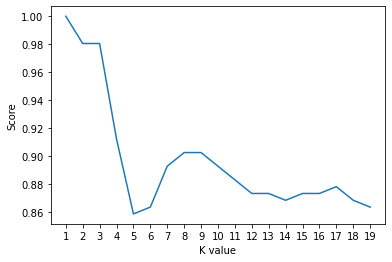

Maximum KNN Score is 100.00%


In [29]:
# try ro find best k value
scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(x_train.T, y_train.T)
    scoreList.append(knn2.score(x_test.T, y_test.T))
    
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(scoreList)*100
accuracies['KNN'] = acc
print("Maximum KNN Score is {:.2f}%".format(acc))

# Support Vector Machine (SVM) Algorithm

In [30]:
from sklearn.svm import SVC

In [31]:
svm = SVC(random_state = 1)
svm.fit(x_train.T, y_train.T)

acc = svm.score(x_test.T,y_test.T)*100
accuracies['SVM'] = acc
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))

Test Accuracy of SVM Algorithm: 90.24%


# Naive Bayes Algorithm

In [32]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train.T, y_train.T)

acc = nb.score(x_test.T,y_test.T)*100
accuracies['Naive Bayes'] = acc
print("Accuracy of Naive Bayes: {:.2f}%".format(acc))

Accuracy of Naive Bayes: 85.37%


# Decision Tree Algorithm

In [33]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train.T, y_train.T)

acc = dtc.score(x_test.T, y_test.T)*100
accuracies['Decision Tree'] = acc
print("Decision Tree Test Accuracy {:.2f}%".format(acc))

Decision Tree Test Accuracy 100.00%


# Random Forest Classification

In [34]:
# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(x_train.T, y_train.T)

acc = rf.score(x_test.T,y_test.T)*100
accuracies['Random Forest'] = acc
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))

Random Forest Algorithm Accuracy Score : 100.00%


# Artificial Neural Network(ANN)

In [35]:
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


 ## Data Description:

In [36]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


 ## Check for null values

In [37]:
data.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

 ## Dependent and Independent variable

In [38]:
X = data.iloc[:,:13].values
y = data["target"].values

In [39]:
X

array([[52.,  1.,  0., ...,  2.,  2.,  3.],
       [53.,  1.,  0., ...,  0.,  0.,  3.],
       [70.,  1.,  0., ...,  0.,  0.,  3.],
       ...,
       [47.,  1.,  0., ...,  1.,  1.,  2.],
       [50.,  0.,  0., ...,  2.,  0.,  2.],
       [54.,  1.,  0., ...,  1.,  1.,  3.]])

In [40]:
y

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

## Split data into Train and Test dataset

In [41]:
X_train,X_test,y_train, y_test = train_test_split(X,y,test_size = 0.3 , random_state = 1 )


 ## Scale the data

In [42]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


 ##  Building the Model

In [43]:
classifier = Sequential()
classifier.add(Dense(activation = "relu", input_dim = 13,
                          units = 8, kernel_initializer = "uniform"))
classifier.add(Dense(activation = "relu", units = 14,
                        kernel_initializer = "uniform"))
classifier.add(Dense(activation = "sigmoid", units = 1,
                        kernel_initializer = "uniform"))
classifier.compile(optimizer = 'adam' , loss = 'binary_crossentropy',
                        metrics = ['accuracy'] )


 ## Fitting the Model

In [44]:
classifier.fit(X_train , y_train , batch_size = 8 ,epochs = 100)


Epoch 1/100
90/90 [==============================] - 1s 2ms/step - loss: 0.6847 - accuracy: 0.7490
Epoch 2/100
90/90 [==============================] - 0s 2ms/step - loss: 0.5475 - accuracy: 0.8550
Epoch 3/100
90/90 [==============================] - 0s 2ms/step - loss: 0.3784 - accuracy: 0.8633
Epoch 4/100
90/90 [==============================] - 0s 2ms/step - loss: 0.3437 - accuracy: 0.8619
Epoch 5/100
90/90 [==============================] - 0s 2ms/step - loss: 0.3352 - accuracy: 0.8661
Epoch 6/100
90/90 [==============================] - 0s 2ms/step - loss: 0.3305 - accuracy: 0.8717
Epoch 7/100
90/90 [==============================] - 0s 2ms/step - loss: 0.3288 - accuracy: 0.8689
Epoch 8/100
90/90 [==============================] - 0s 2ms/step - loss: 0.3260 - accuracy: 0.8661
Epoch 9/100
90/90 [==============================] - 0s 2ms/step - loss: 0.3233 - accuracy: 0.8759
Epoch 10/100
90/90 [==============================] - 0s 2ms/step - loss: 0.3202 - accuracy: 0.8815
Epoch 11/

90/90 [==============================] - 0s 2ms/step - loss: 0.1114 - accuracy: 0.9623
Epoch 84/100
90/90 [==============================] - 0s 2ms/step - loss: 0.1071 - accuracy: 0.9679
Epoch 85/100
90/90 [==============================] - 0s 2ms/step - loss: 0.1052 - accuracy: 0.9651
Epoch 86/100
90/90 [==============================] - 0s 2ms/step - loss: 0.1022 - accuracy: 0.9679
Epoch 87/100
90/90 [==============================] - 0s 2ms/step - loss: 0.0992 - accuracy: 0.9679
Epoch 88/100
90/90 [==============================] - 0s 2ms/step - loss: 0.0969 - accuracy: 0.9693
Epoch 89/100
90/90 [==============================] - 0s 2ms/step - loss: 0.0948 - accuracy: 0.9707
Epoch 90/100
90/90 [==============================] - 0s 2ms/step - loss: 0.0919 - accuracy: 0.9679
Epoch 91/100
90/90 [==============================] - 0s 2ms/step - loss: 0.0905 - accuracy: 0.9693
Epoch 92/100
90/90 [==============================] - 0s 2ms/step - loss: 0.0884 - accuracy: 0.9749
Epoch 93/100


 ## Performing prediction and rescaling

In [45]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

10/10 [==============================] - 0s 2ms/step


 ## Confusion Matrix

In [46]:
cm = confusion_matrix(y_test,y_pred)
cm


array([[151,  10],
       [  4, 143]], dtype=int64)

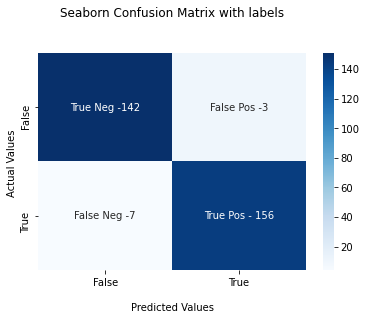

In [47]:
labels = ['True Neg -142','False Pos -3','False Neg -7','True Pos - 156']

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

## Accuracy

In [48]:
accuracy = (cm[0][0]+cm[1][1])/(cm[0][1] + cm[1][0] +cm[0][0] +cm[1][1])

acc = accuracy*100
accuracies['ANN'] = acc
print(acc)

95.45454545454545


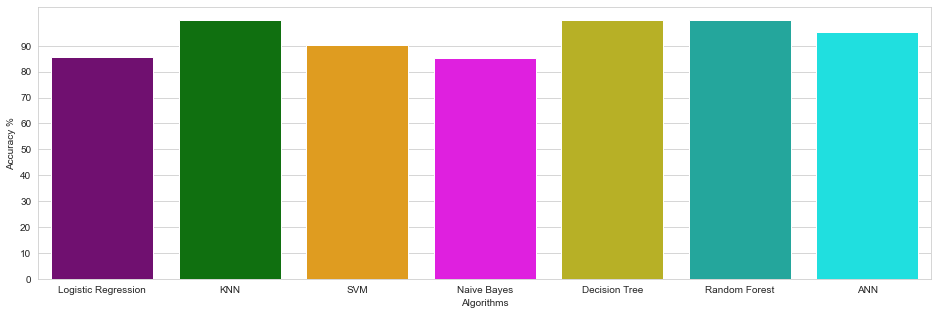

In [49]:
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE","cyan"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()